### Base de dados

Fonte: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

##### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

##### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.read_csv('diabetes.csv')
dados = pd.read_csv('diabetes.csv')

In [3]:
dados.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dados.shape

(768, 9)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dados.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
dados.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Análise dos dados

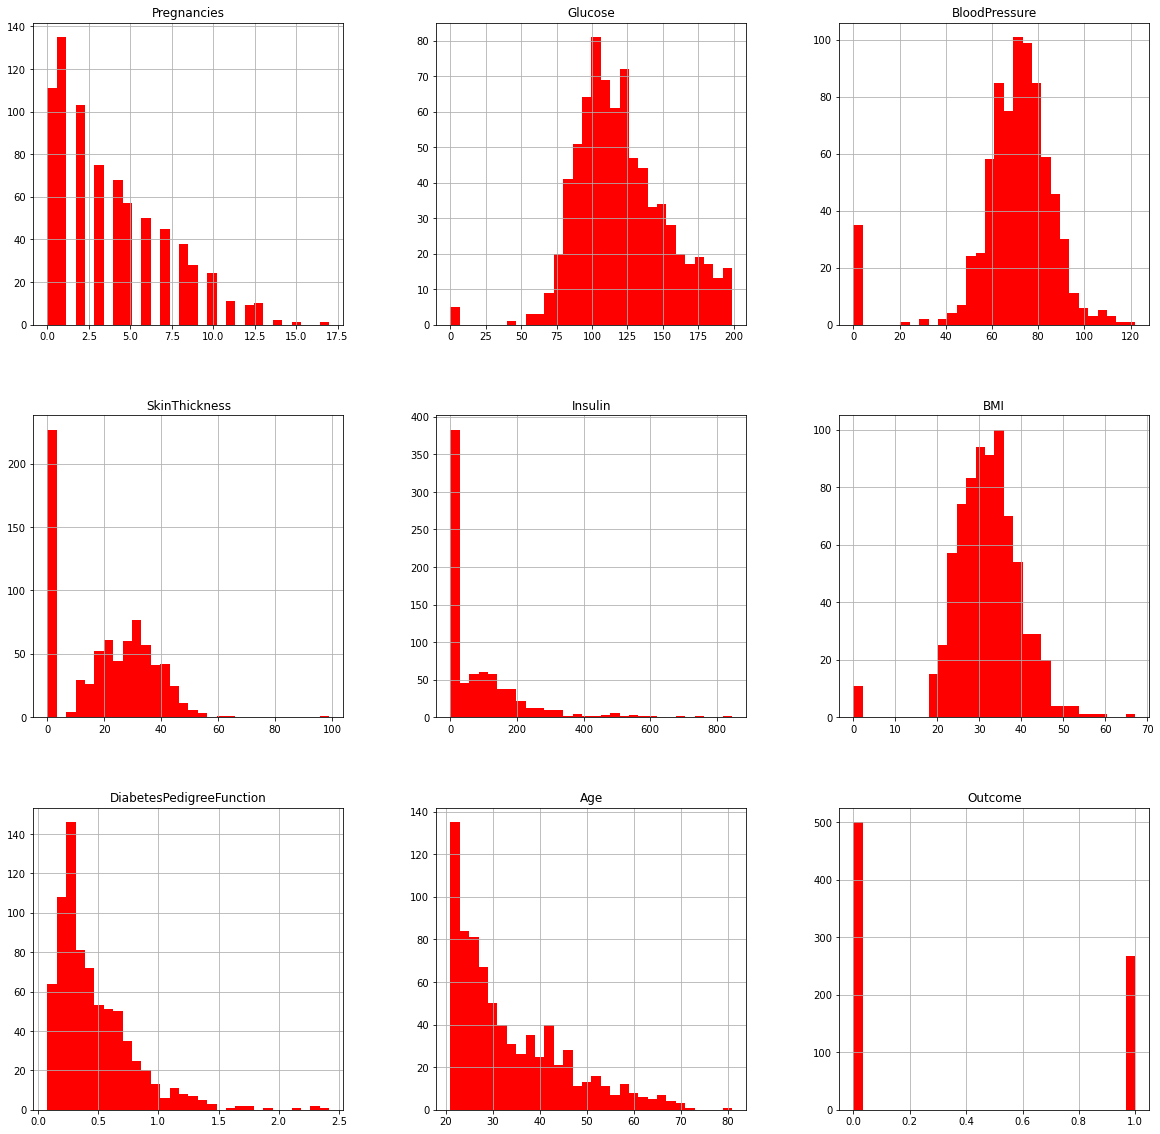

In [8]:
dados.hist(bins = 30, figsize=(20,20), color = 'r');


In [9]:
#temos bastante dados em branco. Vamos transformar em Nan e posteriormente transformar na mediana do target (0 ou 1)
#utilizando o replace
dados[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dados[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [11]:
#criar uma função, já que são 5 colunas

def calcular_mediana(coluna):   
    temp = dados[dados[coluna].notnull()]
    temp = temp[[coluna, 'Outcome']].groupby(['Outcome'])[[coluna]].median().reset_index()
    return temp


In [12]:
calcular_mediana('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [13]:
dados.loc[(dados['Outcome'] == 0 ) & (dados['Glucose'].isnull()), 'Glucose'] = 107
dados.loc[(dados['Outcome'] == 1 ) & (dados['Glucose'].isnull()), 'Glucose'] = 140

In [14]:
calcular_mediana('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [15]:
dados.loc[(dados['Outcome'] == 0 ) & (dados['BloodPressure'].isnull()), 'BloodPressure'] = 70.0
dados.loc[(dados['Outcome'] == 1 ) & (dados['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [16]:
calcular_mediana('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [17]:
dados.loc[(dados['Outcome'] == 0 ) & (dados['SkinThickness'].isnull()), 'SkinThickness'] = 27
dados.loc[(dados['Outcome'] == 1 ) & (dados['SkinThickness'].isnull()), 'SkinThickness'] = 32

In [18]:
calcular_mediana('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [19]:
dados.loc[(dados['Outcome'] == 0 ) & (dados['Insulin'].isnull()), 'Insulin'] = 102.5
dados.loc[(dados['Outcome'] == 1 ) & (dados['Insulin'].isnull()), 'Insulin'] = 169.5

In [20]:
calcular_mediana('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [21]:
dados.loc[(dados['Outcome'] == 0 ) & (dados['BMI'].isnull()), 'BMI'] = 30.1
dados.loc[(dados['Outcome'] == 1 ) & (dados['BMI'].isnull()), 'BMI'] = 34.3

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

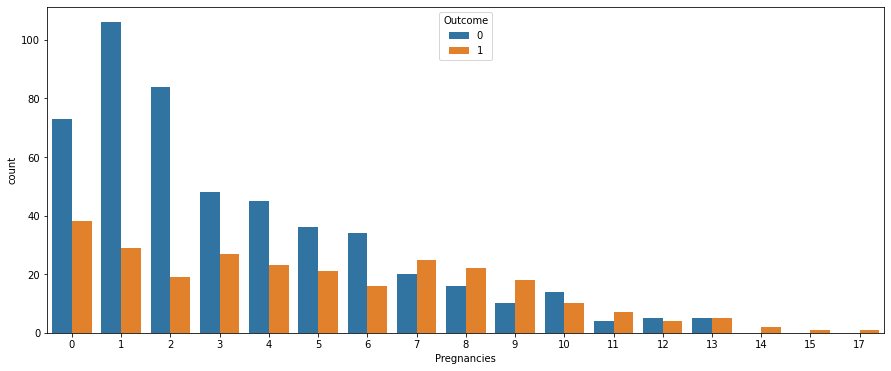

In [22]:
plt.figure(figsize=[15,6])
sns.countplot(x = 'Pregnancies', hue = 'Outcome', data = dados)



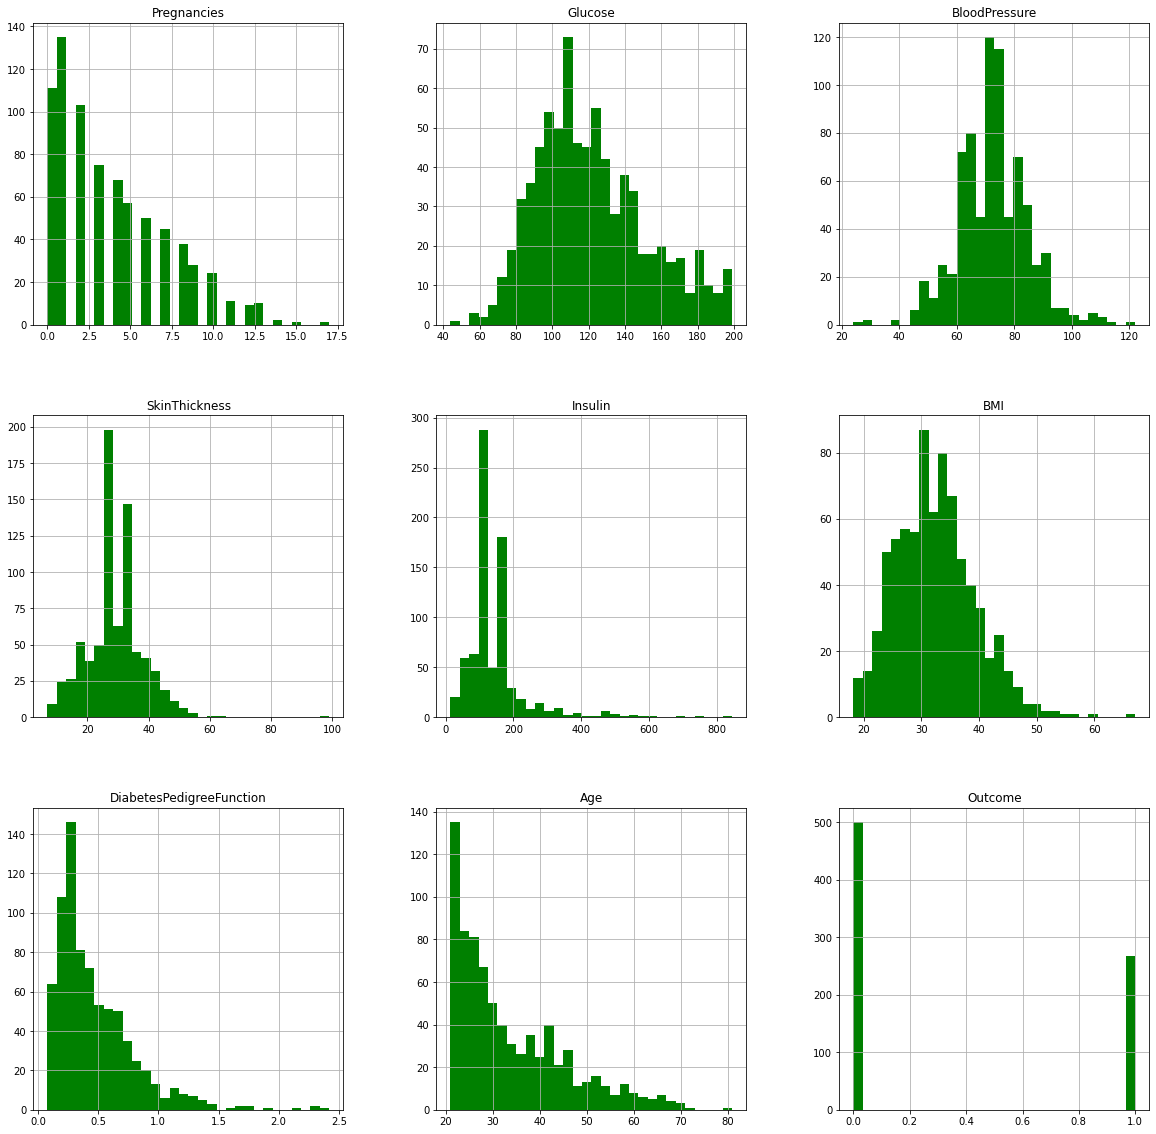

In [23]:
dados.hist(bins = 30, figsize=(20,20), color = 'g');

### PyCaret classificação

Estão comentadas para que o modelo ganhe performance

Para sua utilização é necessário a instalação da biblioteca, de preferência no Python 3.8

In [24]:
#from pycaret.classification import *

In [25]:
#exp_name = setup(data = dados,  target = 'Outcome')


In [26]:
#best_model = compare_models()

NameError: name 'compare_models' is not defined

# Divisão em Treino e Teste

In [27]:
X = dados.drop('Outcome', axis = 1)
y = dados.Outcome

In [28]:
#normalizando os dados
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split

SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state = SEED)

### Métricas

Sobre as métricas:

    -Acurácia: Mede o quanto o modelo acertou ou seja os verdadeiros positivos e verdadeiros negativos
    
    -Precisão: Calcula quantos verdadeiros positivos foram preditos de forma correta
    
    -Recall: Conhecido como sensibilidade, mede quão bom o modelo está em medir o resultado realmente positivo
    
    -F1 Score: Identificar se algum dos valores de recall ou precisão estão baixos
    
    -Curva ROC e AUC: Quanto maior o número mais bem avaliado será o modelo de classificação
    

### AUC Score

Quantifica a Curva ROC através da área sob esta curva

Convenção Estatística:

    -área < 0,7: baixa discriminiação
    -0,7 ≤ área < 0,8: discriminação aceitável
    -0,8 ≤ área < 0,9: discriminação excelente
    -área > 0,9: discriminação excepcional

In [30]:
#importando as métricas
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


In [31]:
#importando a matriz de confusão
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [32]:
#importando a Curva ROC e AOC
from sklearn.metrics import roc_curve, roc_auc_score


### Modelo 01: Gradient Boosting Classifier

Acurácia: 0.879
Precisão: 0.873
Recall: 0.765
F1: 0.863
------------------------------------------------------------------------------------------------------------------------


C:\Users\p_net\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


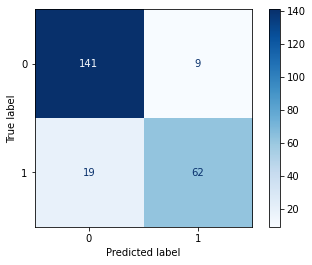

roc_auc: 0.951


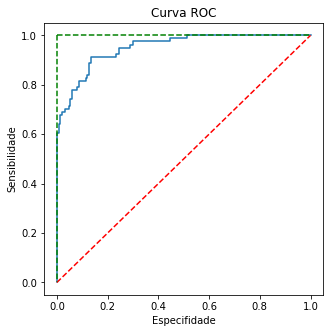

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       150
           1       0.87      0.77      0.82        81

    accuracy                           0.88       231
   macro avg       0.88      0.85      0.86       231
weighted avg       0.88      0.88      0.88       231



In [37]:
from sklearn.ensemble import GradientBoostingClassifier

model1 = GradientBoostingClassifier()

model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print("Acurácia: {:.3}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precisão: {:.3}".format(metrics.precision_score(y_test, y_pred)))
print("Recall: {:.3}".format(metrics.recall_score(y_test, y_pred))) 
print("F1: {:.3}".format(metrics.f1_score(y_test, y_pred, average='macro')))
print('--'*60)

    
cm = plot_confusion_matrix(model1, X_test, y_test, cmap='Blues', values_format = '.3g')
plt.show()
    
prob_previsao = model1.predict_proba(X_test)[:,1] #probabilidade do evento ser predito como 0 ou 1 - uma matriz com 2 colunas

    #tfp = taxa falsos positivos
    #tvp = taxa verdadeiros positivos

tfp, tvp, limite = roc_curve(y_test, prob_previsao)
print('roc_auc: {:.3}'.format(roc_auc_score(y_test, prob_previsao)))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

print(classification_report(y_test, y_pred))

Feature: 0, Score: 0.01559
Feature: 1, Score: 0.11892
Feature: 2, Score: 0.01366
Feature: 3, Score: 0.04297
Feature: 4, Score: 0.67994
Feature: 5, Score: 0.04170
Feature: 6, Score: 0.04570
Feature: 7, Score: 0.04154


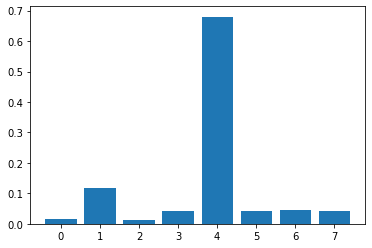

In [43]:
#importancia das features
importancia = model1.feature_importances_
#resumo da importância
for i,v in enumerate(importancia):
    print('Feature: %0d, Score: %.5f' % (i,v))
#plotagem dos dados
plt.bar([x for x in range(len(importancia))], importancia)
plt.show()

### Modelo 02: Logistic Regression


Acurácia: 0.762
Precisão: 0.703
Recall: 0.556
F1: 0.724
------------------------------------------------------------------------------------------------------------------------


C:\Users\p_net\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


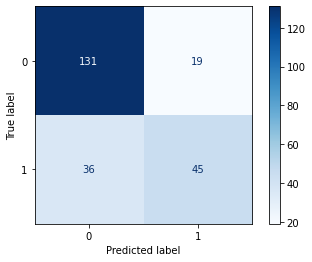

roc_auc: 0.852


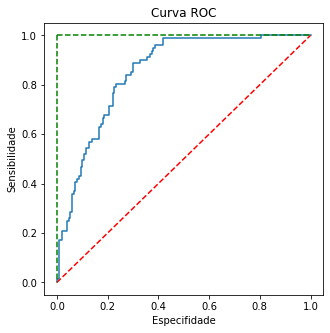

              precision    recall  f1-score   support

           0       0.78      0.87      0.83       150
           1       0.70      0.56      0.62        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



In [38]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()

model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

print("Acurácia: {:.3}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precisão: {:.3}".format(metrics.precision_score(y_test, y_pred)))
print("Recall: {:.3}".format(metrics.recall_score(y_test, y_pred))) 
print("F1: {:.3}".format(metrics.f1_score(y_test, y_pred, average='macro')))
print('--'*60)

    
cm = plot_confusion_matrix(model2, X_test, y_test, cmap='Blues', values_format = '.3g')
plt.show()
    
prob_previsao = model2.predict_proba(X_test)[:,1] #probabilidade do evento ser predito como 0 ou 1 - uma matriz com 2 colunas

    #tfp = taxa falsos positivos
    #tvp = taxa verdadeiros positivos

tfp, tvp, limite = roc_curve(y_test, prob_previsao)
print('roc_auc: {:.3}'.format(roc_auc_score(y_test, prob_previsao)))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

print(classification_report(y_test, y_pred))

In [49]:
print('A regressão logística não possui o atributo feature_importances_')

A regressão logística não possui o atributo feature_importances_


### Modelo 03: 	Random Forest Classifier

Acurácia: 0.866
Precisão: 0.829
Recall: 0.778
F1: 0.85
------------------------------------------------------------------------------------------------------------------------


C:\Users\p_net\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


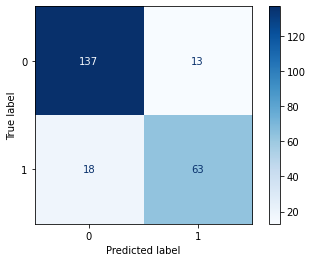

roc_auc: 0.938


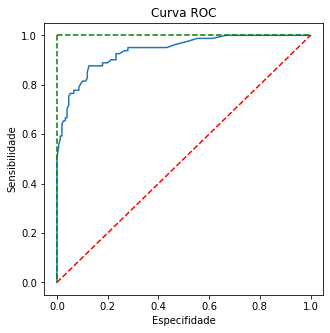

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       150
           1       0.83      0.78      0.80        81

    accuracy                           0.87       231
   macro avg       0.86      0.85      0.85       231
weighted avg       0.86      0.87      0.86       231



In [39]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier()

model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

print("Acurácia: {:.3}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precisão: {:.3}".format(metrics.precision_score(y_test, y_pred)))
print("Recall: {:.3}".format(metrics.recall_score(y_test, y_pred))) 
print("F1: {:.3}".format(metrics.f1_score(y_test, y_pred, average='macro')))
print('--'*60)

    
cm = plot_confusion_matrix(model3, X_test, y_test, cmap='Blues', values_format = '.3g')
plt.show()
    
prob_previsao = model3.predict_proba(X_test)[:,1] #probabilidade do evento ser predito como 0 ou 1 - uma matriz com 2 colunas

    #tfp = taxa falsos positivos
    #tvp = taxa verdadeiros positivos

tfp, tvp, limite = roc_curve(y_test, prob_previsao)
print('roc_auc: {:.3}'.format(roc_auc_score(y_test, prob_previsao)))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

print(classification_report(y_test, y_pred))

Feature: 0, Score: 0.05320
Feature: 1, Score: 0.16080
Feature: 2, Score: 0.04912
Feature: 3, Score: 0.15065
Feature: 4, Score: 0.33819
Feature: 5, Score: 0.08694
Feature: 6, Score: 0.07546
Feature: 7, Score: 0.08563


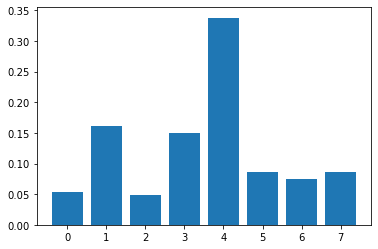

In [44]:
#importancia das features
importancia = model3.feature_importances_
#resumo da importância
for i,v in enumerate(importancia):
    print('Feature: %0d, Score: %.5f' % (i,v))
#plotagem dos dados
plt.bar([x for x in range(len(importancia))], importancia)
plt.show()

### Modelo 04: Decision Tree Classifier

Acurácia: 0.844
Precisão: 0.785
Recall: 0.765
F1: 0.828
------------------------------------------------------------------------------------------------------------------------


C:\Users\p_net\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


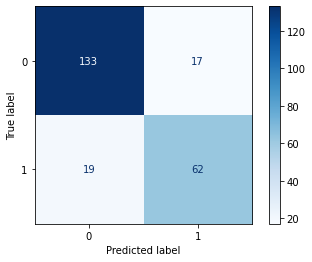

roc_auc: 0.826


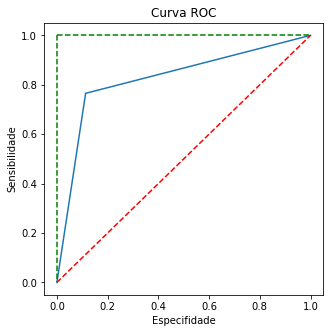

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       150
           1       0.78      0.77      0.77        81

    accuracy                           0.84       231
   macro avg       0.83      0.83      0.83       231
weighted avg       0.84      0.84      0.84       231



In [40]:
from sklearn.tree import DecisionTreeClassifier

model4 = DecisionTreeClassifier()

model4.fit(X_train, y_train)

y_pred = model4.predict(X_test)

print("Acurácia: {:.3}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precisão: {:.3}".format(metrics.precision_score(y_test, y_pred)))
print("Recall: {:.3}".format(metrics.recall_score(y_test, y_pred))) 
print("F1: {:.3}".format(metrics.f1_score(y_test, y_pred, average='macro')))
print('--'*60)

    
cm = plot_confusion_matrix(model4, X_test, y_test, cmap='Blues', values_format = '.3g')
plt.show()
    
prob_previsao = model4.predict_proba(X_test)[:,1] #probabilidade do evento ser predito como 0 ou 1 - uma matriz com 2 colunas

    #tfp = taxa falsos positivos
    #tvp = taxa verdadeiros positivos

tfp, tvp, limite = roc_curve(y_test, prob_previsao)
print('roc_auc: {:.3}'.format(roc_auc_score(y_test, prob_previsao)))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

print(classification_report(y_test, y_pred))

Feature: 0, Score: 0.04496
Feature: 1, Score: 0.10732
Feature: 2, Score: 0.04078
Feature: 3, Score: 0.05624
Feature: 4, Score: 0.58481
Feature: 5, Score: 0.03851
Feature: 6, Score: 0.07469
Feature: 7, Score: 0.05268


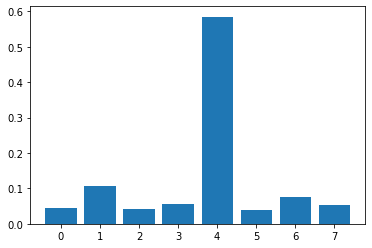

In [46]:
#importancia das features
importancia = model4.feature_importances_
#resumo da importância
for i,v in enumerate(importancia):
    print('Feature: %0d, Score: %.5f' % (i,v))
#plotagem dos dados
plt.bar([x for x in range(len(importancia))], importancia)
plt.show()